<a href="https://colab.research.google.com/github/kimhj010502/ESAA_OB/blob/main/%EC%BA%90%EA%B8%80_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 분류: 의류 이미지 분류
https://www.tensorflow.org/tutorials/keras/classification?hl=ko

- 이 튜토리얼에서는 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련함
- 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 `tf.keras`를 사용함

In [1]:
#TensorFlow and tf.keras
import tensorflow as tf

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## 패션 MNIST 데이터셋 임포트하기

- 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용
- 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냄
<br><a href='https://ifh.cc/v-aZV1wN' target='_blank'><img src='https://ifh.cc/g/aZV1wN.jpg' border='0' width='500'></a><br>

- 여기에서 60,000개의 이미지를 사용하여 네트워크를 훈련하고 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가함

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됨:
    - `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 훈련 세트임
    - `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 테스트 세트임

- 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이임
- 레이블 (label)은 0에서 9까지의 정수 배열임
- 이 값은 이미지에 있는 옷의 클래스 (class)를 나타냄

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

- 각 이미지는 하나의 레이블에 매핑되어 있음
- 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장함 

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 데이터 전처리
- 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이임

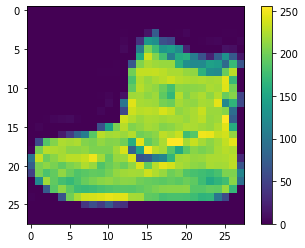

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하기 위해 255로 나누어야 함
- 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요함

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

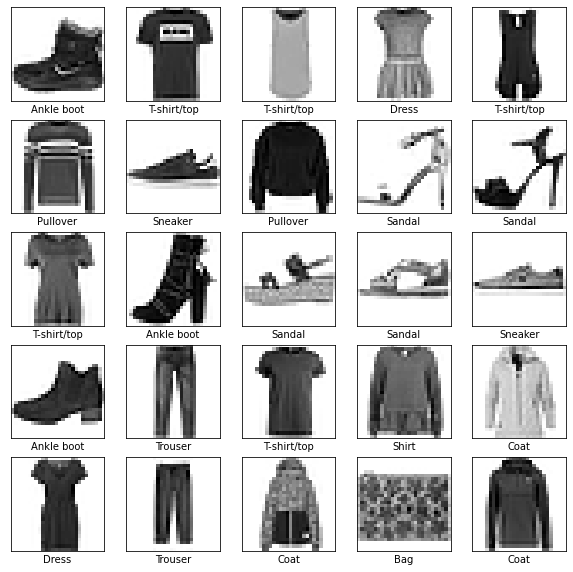

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성
- 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일함

### 층 설정
- 신경망의 기본 빌딩 블록은 레이어이고, 레이어는 레이어에 공급된 데이터로부터 표현을 추출함
- 대부분 딥러닝은 간단한 층을 연결하여 구성되며 `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됨

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- 이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환함
- 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘리며, 학습되는 가중치가 없고 데이터를 변환하기만 함
<br><br>
- 픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결됨
- 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부름
- 첫 번째 `Dense` 층은 128개의 노드(또는 뉴런)를 가지고, 두 번째 (마지막) 층은 10개의 노드의 소프트맥스 (softmax) 층임
- 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이며, 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력함



### 모델 컴파일
- 모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 컴파일 단계에서 추가됨
    - 손실 함수: 훈련 중 모델이 얼마나 정확한지 측정하며 모델을 올바른 방향으로 조정하려면 이 함수를 최소화해야 함
    - 옵티마이저: 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식임
    - 메트릭: 훈련 및 테스트 단계를 모니터링하는 데 사용되며 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용함

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련
1. 훈련 데이터를 모델에 주입함- 이 예에서는 `train_images`와 `train_labels` 배열임
2. 모델이 이미지와 레이블을 매핑하는 방법을 학습함
3. 테스트 세트에 대한 모델의 예측을 만듦 - 이 예에서는 `test_images` 배열임. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인함
4. 예측이 `test_labels` 배열의 레이블과 일치하는지 확인함


### 모델 피드
- 훈련을 시작하려면 `model.fit` 메서드를 호출함

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4992 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3735 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3333 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3125 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2941 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2777 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2668 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2552 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2446 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2

- 모델이 훈련되면서 손실과 정확도 지표가 출력됨
- 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성함

### 정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3489 - accuracy: 0.8812 - 850ms/epoch - 3ms/step

Test accuracy: 0.8812000155448914


- 테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮은데, 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합 (overfitting) 때문임
- 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말함

### 예측하기
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있음
- 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환함

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
#첫 번째 예측
predictions[0]

array([2.4613867e-09, 7.8082980e-14, 3.9757381e-11, 7.1447853e-14,
       2.2193333e-10, 4.5128596e-05, 6.6960318e-08, 7.8888955e-03,
       5.4334637e-11, 9.9206591e-01], dtype=float32)

In [19]:
#가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

9

In [20]:
#테스트 레이블 확인
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있음

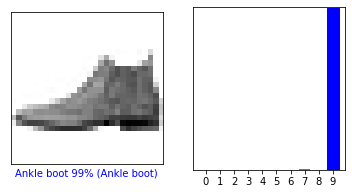

In [22]:
#0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

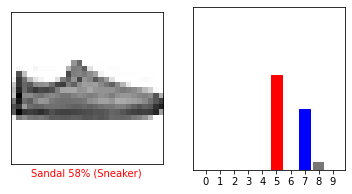

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

- 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨간색임
- 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)으로, 신뢰도 점수가 높을 때도 잘못 예측할 수 있음

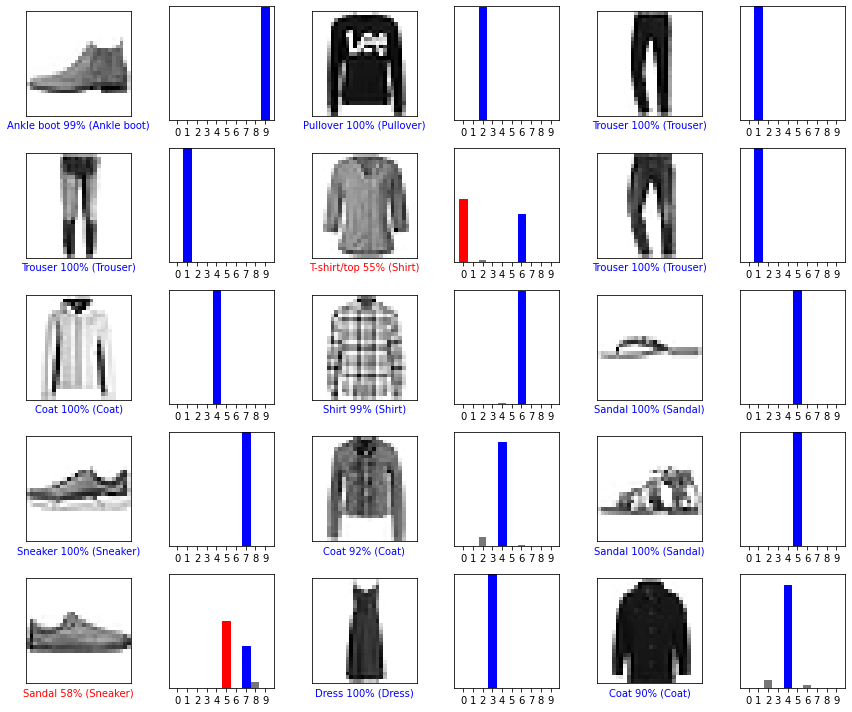

In [24]:
#Plot the first X test images, their predicted labels, and the true labels.
#Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기
- 마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듦

In [25]:
#Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


- `tf.keras` 모델은 한 번에 샘플의 묶음 또는 배치 (batch)로 예측을 만드는데 최적화되어 있음
- 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 함

In [26]:
#Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[1.1582843e-05 3.8015655e-10 9.9728692e-01 2.2371109e-10 2.3419699e-03
  4.3903340e-12 3.5949110e-04 1.4079674e-15 1.2660856e-09 5.2879667e-10]]


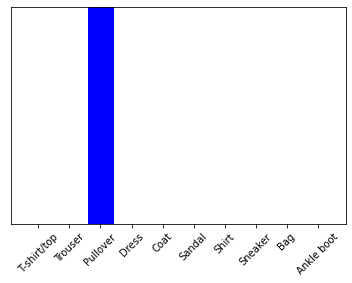

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

- `tf.keras.Model.predict`는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환하며, 배치에서 (유일한) 이미지에 대한 예측을 가져옴

In [29]:
np.argmax(predictions_single[0])

2